In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [70]:
%matplotlib inline

In [17]:
def R(zeta):
    Rrot=np.array([[1,0,0],[0,np.cos(zeta),np.sin(zeta)],[0,-np.sin(zeta),np.cos(zeta)]])
    return Rrot

In [54]:
def plane(ax):
    xx, yy = np.meshgrid(range(-1,2), range(-1,2))
    zz = xx*0-1
    ax.plot_surface(xx, yy, zz,color="g",alpha=0.3)

In [212]:
def sphere(ax,zeta):
    u, v = np.mgrid[0:2*np.pi:240j, 0:np.pi:120j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    x,y,z=np.einsum("ij,jkl->ikl",R(zeta/180*np.pi),np.array([x,y,z]))
    ax.plot_wireframe(x, y, z, color="b",alpha=0.3)

In [213]:
def spinaxis(ax,zeta):
    l=1.5
    ax.quiver(0,-l*np.sin(zeta/180*np.pi),-l*np.cos(zeta/180*np.pi),0,np.sin(zeta/180*np.pi),np.cos(zeta/180*np.pi), \
              length=2*l, normalize=True,arrow_length_ratio=0.05,lw=3,color="b")
    zdir=[0,np.sin(zeta/180*np.pi),np.cos(zeta/180*np.pi)]
    ax.text(0,l*np.sin(zeta/180*np.pi),l*np.cos(zeta/180*np.pi), "Spin axis", zdir, color="b",fontsize=15)

In [214]:
def orbitaxis(ax):
    ax.quiver(0,0,-1,0,0,1, \
              length=2.3, normalize=True,arrow_length_ratio=0.05,lw=3,color="g",alpha=0.3)
    ax.text(0, -1, -1, "Orbital Plane", "x", color="g",fontsize=15)
    ax.text(0, 0, 1.3, "Orbital axis", "z", color="g",fontsize=15,horizontalalignment="center")

Text(0.5, 0, 'y')

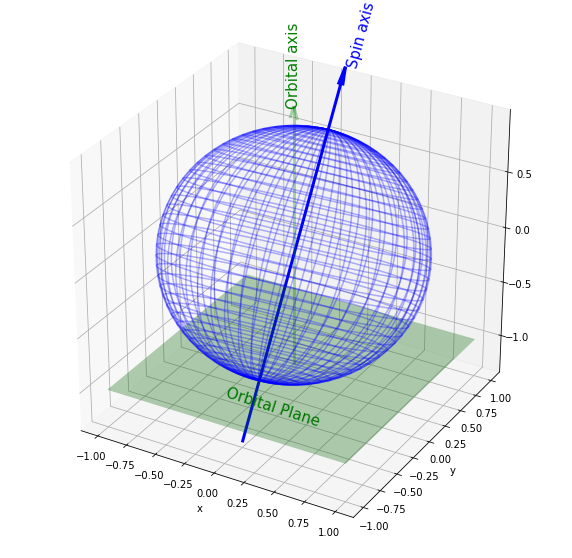

In [216]:
zeta=30.0

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
sphere(ax,zeta)
plane(ax)
spinaxis(ax,zeta)
orbitaxis(ax)
plt.xlabel("x")
plt.ylabel("y")